In [1]:
"""
A randomly connected network learning a sequence

This example contains a reservoir network of 500 neurons.
400 neurons are excitatory and 100 neurons are inhibitory.
The weights are initialized randomly, based on a log-normal distribution.

The network activity is stimulated with three different inputs (A, B, C).
The inputs are given in i a row (A -> B -> C -> A -> ...)

The experiment is defined in 'pelenet/experiments/sequence.py' file.
A log file, parameters, and plot figures are stored in the 'log' folder for every run of the simulation.

NOTE: The main README file contains some more information about the structure of pelenet
"""

# Load pelenet modules
from pelenet.utils import Utils
from pelenet.experiments.sequence import SequenceExperiment

# Official modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/sequence.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 10,  # Number of trials
    'stepsPerTrial': 60,  # Number of simulation steps for every trial
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100,  # Voltage time constant
    'currentTau': 5,  # Current time constant
    'thresholdMant': 1200,  # Spiking threshold for membrane potential
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35,  # Number of connections per neuron
    'isLearningRule': True,  # Apply a learning rule
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',  # Defines the learning rule
    # Input
    'inputIsSequence': True,  # Activates sequence input
    'inputSequenceSize': 3,  # Number of input clusters in sequence
    'inputSteps': 20,  # Number of steps the trace input should drive the network
    'inputGenSpikeProb': 0.8,  # Probability of spike for the generator
    'inputNumTargetNeurons': 40,  # Number of neurons activated by the input
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [3]:
# Initilizes the experiment, also initializes the log
# Creating a new object results in a new log entry in the 'log' folder
# The name is optional, it is extended to the folder in the log directory
exp = SequenceExperiment(name='random-network-sequence-learning', parameters=parameters)

In [4]:
# Instantiate the utils singleton
utils = Utils.instance()

In [5]:
# Build the network, in this function the weight matrix, inputs, probes, etc. are defined and created
exp.build()

In [6]:
# Run the network simulation, afterwards the probes are postprocessed to nice arrays
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:37097
INFO:DRV:      Host server up..............Done 0.02s
INFO:DRV:      Encoding axons/synapses.....Done 0.39s
INFO:DRV:      Compiling Embedded snips....Done 0.09s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599817853.5032048/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.67s
INFO:DRV:      Encoding probes.............Done 0.02s
INFO:DRV:      Transferring probes.........Done 0.07s
INFO:DRV:      Configuring registers.......Done 0.44s
INFO:DRV:      Transferring spikes.........Done 0.09s
INFO:DRV:      Executing...................Done 7.37s
INFO:DRV:      Processing timeseries.......Done 0.36s
INFO:DRV:  Executor: 600 timesteps.........Done 10.64s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


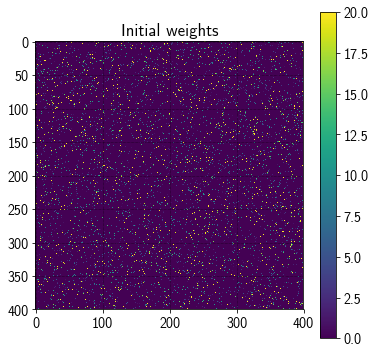

In [7]:
# Weight matrix before learning (randomly initialized)
exp.net.plot.initialExWeightMatrix()

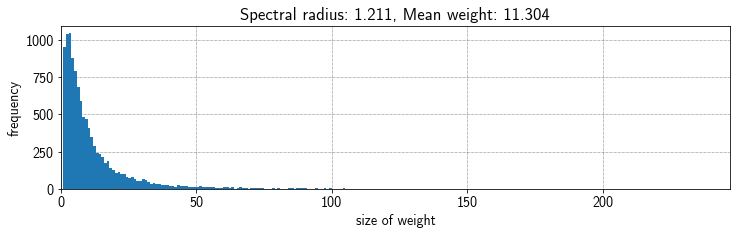

In [8]:
# Plot distribution of weights
exp.net.plot.initialExWeightDistribution(figsize=(12,3))

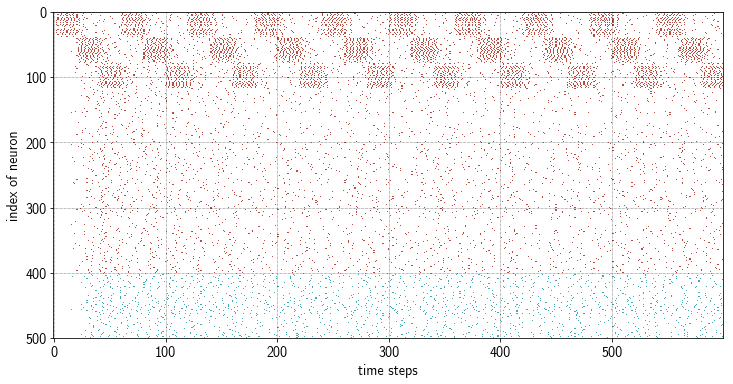

In [9]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6), to=600)

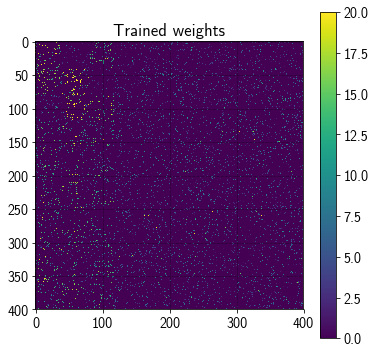

In [10]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

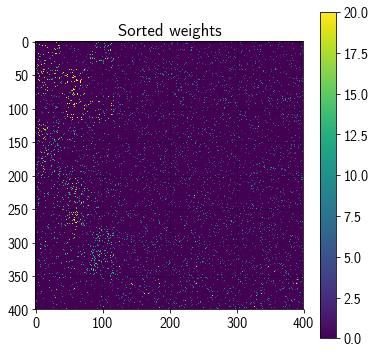

In [11]:
# Sorted weight matrix after learning
supportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex)
exp.net.plot.weightsSortedBySupport(supportMask)